# Perkenalan

Nama/batch = Sandika/008

# Import Pustaka

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [ ]:
df=pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [ ]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

terdapat 4 baris NaN di kolom name dan 3797 di kolom usd_pledged

# Data Cleaning

In [ ]:
df_copy=df.copy()

In [ ]:
df1=df_copy.drop('usd pledged', axis = 1) #menghapus kolom 'usd_pledged' karena nilai kolomnya sama dengan 'usd_pledged_real'

In [ ]:
df1.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00


In [ ]:
df1.isna().sum()

ID                  0
name                4
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [ ]:
df1['name'].fillna('NoName', inplace=True) #perintah mengganti kolom nama yang kosong menjadi 'NoName'

In [ ]:
df1.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

Data sudah tidak memiliki nilai NaN

# Eksplorasi Data

In [ ]:
df1.groupby('main_category')['state'].value_counts()

main_category  state     
Art            failed        14131
               successful    11510
               canceled       2222
               live            194
               suspended        96
                             ...  
Theater        failed         3708
               canceled        608
               live             41
               suspended        21
               undefined         1
Name: state, Length: 85, dtype: int64

In [ ]:
df2 = df1.query("state == ['successful','failed'] ").reset_index().drop(columns = 'index')#mengambil data dengan status gagal dan sukses menjadi data frame baru

In [ ]:
df2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,50000.00


In [ ]:
df2.groupby('main_category')['state'].value_counts() #mencari jumlah pendanaan yang sukses dan gagal di tiap kategori

main_category  state     
Art            failed        14131
               successful    11510
Comics         successful     5842
               failed         4036
Crafts         failed         5703
               successful     2115
Dance          successful     2338
               failed         1235
Design         failed        14814
               successful    10550
Fashion        failed        14182
               successful     5593
Film & Video   failed        32904
               successful    23623
Food           failed        15969
               successful     6085
Games          failed        16003
               successful    12518
Journalism     failed         3137
               successful     1012
Music          successful    24197
               failed        21752
Photography    failed         6384
               successful     3305
Publishing     failed        23145
               successful    12300
Technology     failed        20616
               successful    

In [ ]:
df2.groupby('country')['state'].value_counts() #mencari jumlah pendanaan yang sukses dan gagal di tiap Negara

country  state     
AT       failed           378
         successful       107
AU       failed          4606
         successful      2010
BE       failed           371
         successful       152
CA       failed          8236
         successful      4134
CH       failed           465
         successful       187
DE       failed          2499
         successful       937
DK       failed           566
         successful       360
ES       failed          1381
         successful       492
FR       failed          1612
         successful       908
GB       failed         17387
         successful     12067
HK       failed           261
         successful       216
IE       failed           476
         successful       207
IT       failed          1930
         successful       439
JP       failed            16
         successful         7
LU       failed            38
         successful        19
MX       failed          1015
         successful       396
N,0"     failed     

# Measure of Central Tendency

In [ ]:
print ('Mean :', df2['usd_goal_real'].mean())
print ('Median :', df2['usd_goal_real'].median())
print ('Mode :', df2['usd_goal_real'].mode())


Mean : 41510.00154283562
Median : 5000.0
Mode : 0    5000.0
Name: usd_goal_real, dtype: float64


formula perhitungan rata2, nilai tengah, dan modus

# Measure of Variance

In [ ]:
print ('Min :', df2['usd_goal_real'].min())
print ('Max :', df2['usd_goal_real'].max())
print ('Variance:',df2['usd_goal_real'].var())
print ('Standar dev:',df2['usd_goal_real'].std())

Min : 0.01
Max : 166361390.71
Variance: 1229724997674.051
Standar dev: 1108929.6630869114


perhitungan mencari nilai max, minimum, variance, dan standar deviasi

In [ ]:
kolom = ['usd_goal_real']
for i in kolom:
    print(  'Range: ' + str(df2[i].max() - df2[i].min()))

Range: 166361390.70000002


perhitungan untuk mencari range

# Hyphotesis Testing


Two Samples Independent Two Tailed Hypothesis Testing

- H0 = Apakah rata2 harga pendanaan yang sukses GB = US
- H1 = Apakah rata2 harga pendanaan yang sukses GB != US

In [ ]:
GB = df2[df2['country']=='GB'][df2['main_category']=='Art'][df2['state']=='successful'][['ID','usd_goal_real']].groupby('ID').sum()
US = df2[df2['country']=='US'][df2['main_category']=='Art'][df2['state']=='successful'][['ID','usd_goal_real']].groupby('ID').sum()
print('Rata-rata harga pendanaan Great Britain (GB) yang sukses pada kategori seni: {}'.format(np.round(GB.usd_goal_real.mean())))
print('Rata-rata harga pendanaan United States (US) yang sukses pada kategori seni: {}'.format(np.round(US.usd_goal_real.mean())))

C:\Users\Sandika\AppData\Local\Temp\ipykernel_14352\483921021.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  GB = df2[df2['country']=='GB'][df2['main_category']=='Art'][df2['state']=='successful'][['ID','usd_goal_real']].groupby('ID').sum()
C:\Users\Sandika\AppData\Local\Temp\ipykernel_14352\483921021.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  US = df2[df2['country']=='US'][df2['main_category']=='Art'][df2['state']=='successful'][['ID','usd_goal_real']].groupby('ID').sum()


Rata-rata harga pendanaan Great Britain (GB) yang sukses pada kategori seni: 3884.0
Rata-rata harga pendanaan United States (US) yang sukses pada kategori seni: 4523.0


In [ ]:
t_stat, p_val = stats.ttest_ind(GB,US)
print('P-value:',p_val)#the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: [0.05611949]
t-statistics: [-1.91031653]


karena P value > 0.05 maka hipotesis dimana rata2 pendanaah sukses di Great Britain dan United States sama bisa diterima

C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


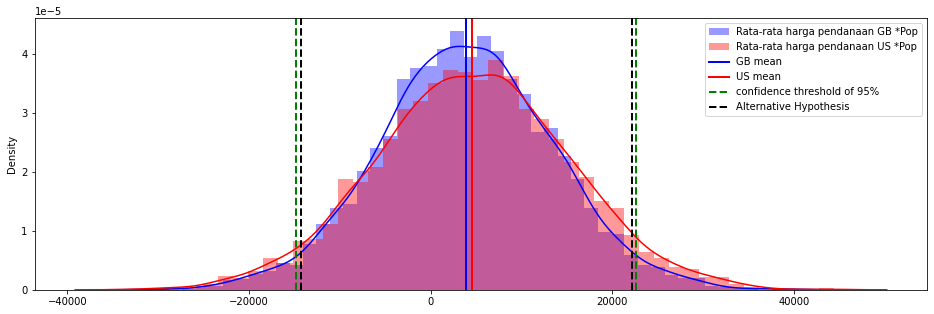

In [ ]:
GB_pop = np.random.normal(GB.usd_goal_real.mean(),GB.usd_goal_real.std(),5000)
US_pop = np.random.normal(US.usd_goal_real.mean(),US.usd_goal_real.std(),5000)

ci = stats.norm.interval(0.95,GB.usd_goal_real.mean(), GB.usd_goal_real.std())
plt.figure(figsize=(16,5))
sns.distplot(GB_pop, label='Rata-rata harga pendanaan GB *Pop',color='blue')
sns.distplot(US_pop, label='Rata-rata harga pendanaan US *Pop',color='red')

plt.axvline(GB.usd_goal_real.mean(), color='blue', linewidth=2, label='GB mean')
plt.axvline(US.usd_goal_real.mean(), color='red',  linewidth=2, label='US mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(GB_pop.mean()+t_stat[0]*GB_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(GB_pop.mean()-t_stat[0]*GB_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

# Kesimpulan


HO dimana pernyataannya adalah Apakah rata2 harga pendanaan yang sukses GB = US dapat diterima dengan alasan:

- nilai dari P-value: [0.05611949], dimana angka ini lebih besar dari 0.05
- garis alternative hypothesis masih berada didalam garis confidence threshold of 95%
- data terdistribusi secara normal, bisa ditarik kesimpulan dari bentuk grafik